In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [46]:
df_stations = pd.read_csv('Air_quality_data/Stazioni_qualit__dell_aria_20240430.csv')
df_air_quality1 = pd.read_csv('Air_quality_data/Dati_sensori_aria_2010-2017_20240430.csv', low_memory=False)
df_air_quality2 = pd.read_csv('Air_quality_data/Dati_sensori_aria_dal_2018_20240430.csv', low_memory=False)

In [47]:
# Add the two dataframes together by row
df_air_quality = pd.concat([df_air_quality1, df_air_quality2], axis=0)

In [48]:
milan_municipalities = [
    'Abbiategrasso', 'Albairate', 'Arconate', 'Arese', 'Arluno', 'Assago',
    'Baranzate', 'Bareggio', 'Basiano', 'Basiglio', 'Bellinzago Lombardo', 'Bernate Ticino', 'Besate', 'Binasco', 'Boffalora Sopra Ticino', 'Bollate', 'Bresso', 'Bubbiano', 'Buccinasco', 'Buscate', 'Bussero', 'Busto Garolfo',
    'Calvignasco', 'Cambiago', 'Canegrate', 'Carpiano', 'Carugate', 'Casarile', 'Casorezzo', 'Cassano d\'Adda', 'Cassina de\' Pecchi', 'Cassinetta di Lugagnano', 'Castano Primo', 'Cernusco sul Naviglio', 'Cerro Maggiore', 'Cerro al Lambro', 'Cesano Boscone', 'Cesate', 'Cinisello Balsamo', 'Cisliano', 'Cologno Monzese', 'Colturano', 'Corbetta', 'Cormano', 'Cornaredo', 'Corsico', 'Cuggiono', 'Cusago', 'Cusano Milanino',
    'Dairago', 'Dresano',
    'Gaggiano', 'Garbagnate Milanese', 'Gessate', 'Gorgonzola', 'Grezzago', 'Gudo Visconti',
    'Inveruno', 'Inzago',
    'Lacchiarella', 'Lainate', 'Legnano', 'Liscate', 'Locate di Triulzi',
    'Magenta', 'Magnago', 'Marcallo con Casone', 'Masate', 'Mediglia', 'Melegnano', 'Melzo', 'Mesero', 'Milano', 'Morimondo', 'Motta Visconti',
    'Nerviano', 'Nosate', 'Novate Milanese', 'Noviglio',
    'Opera', 'Ossona', 'Ozzero',
    'Paderno Dugnano', 'Pantigliate', 'Parabiago', 'Paullo', 'Pero', 'Peschiera Borromeo', 'Pessano con Bornago', 'Pieve Emanuele', 'Pioltello', 'Pogliano Milanese', 'Pozzo D\'Adda', 'Pozzuolo Martesana', 'Pregnana Milanese',
    'Rescaldina', 'Rho', 'Robecchetto con Induno', 'Robecco sul Naviglio', 'Rodano', 'Rosate', 'Rozzano',
    'San Colombano al Lambro', 'San Donato Milanese', 'San Giorgio su Legnano', 'San Giuliano Milanese', 'San Vittore Olona', 'San Zenone al Lambro', 'Santo Stefano Ticino', 'Sedriano', 'Segrate', 'Senago', 'Sesto San Giovanni', 'Settala', 'Settimo Milanese', 'Solaro',
    'Trezzano Rosa', 'Trezzano sul Naviglio', 'Trezzo sull\'Adda', 'Tribiano', 'Truccazzano', 'Turbigo',
    'Vanzaghello', 'Vanzago', 'Vaprio d\'Adda', 'Vermezzo con Zelo', 'Vernate', 'Vignate', 'Villa Cortese', 'Vimodrone', 'Vittuone', 'Vizzolo Predabissi',
    'Zibido San Giacomo'
]

In [49]:
## Print the number of municipalities in Milan
print(len(milan_municipalities))

133


In [50]:
## Make a list of municipalities in Milan that are not in the dataset
not_in_dataset = [municipality for municipality in milan_municipalities if municipality not in df_stations['Comune'].unique()]
print(not_in_dataset)

['Albairate', 'Arluno', 'Assago', 'Baranzate', 'Bareggio', 'Basiano', 'Basiglio', 'Bellinzago Lombardo', 'Bernate Ticino', 'Besate', 'Binasco', 'Boffalora Sopra Ticino', 'Bollate', 'Bresso', 'Bubbiano', 'Buccinasco', 'Buscate', 'Bussero', 'Busto Garolfo', 'Calvignasco', 'Cambiago', 'Canegrate', 'Carpiano', 'Carugate', 'Casarile', 'Casorezzo', "Cassina de' Pecchi", 'Cassinetta di Lugagnano', 'Cernusco sul Naviglio', 'Cerro Maggiore', 'Cerro al Lambro', 'Cesano Boscone', 'Cesate', 'Cisliano', 'Cologno Monzese', 'Colturano', 'Corbetta', 'Cornaredo', 'Cusago', 'Cusano Milanino', 'Dairago', 'Dresano', 'Gaggiano', 'Gessate', 'Gorgonzola', 'Grezzago', 'Gudo Visconti', 'Inveruno', 'Liscate', 'Locate di Triulzi', 'Magnago', 'Marcallo con Casone', 'Masate', 'Mediglia', 'Melzo', 'Mesero', 'Morimondo', 'Nerviano', 'Nosate', 'Novate Milanese', 'Noviglio', 'Opera', 'Ossona', 'Ozzero', 'Paderno Dugnano', 'Pantigliate', 'Parabiago', 'Paullo', 'Peschiera Borromeo', 'Pessano con Bornago', 'Pieve Emanuel

In [51]:
## Drop rows with municipalities not in the list of milan_municipalities
df_milano_stations = df_stations[df_stations['Comune'].isin(milan_municipalities)]
print(df_milano_stations['Comune'].unique())

['Inzago' 'Pero' 'Sesto San Giovanni' 'Lacchiarella' 'Cormano' 'Corsico'
 'Milano' "Cassano d'Adda" 'Cuggiono' "Trezzo sull'Adda"
 'Cinisello Balsamo' 'Legnano' 'Motta Visconti' 'Magenta' 'Turbigo'
 'Robecchetto con Induno' 'Arconate' 'Settimo Milanese' 'Pioltello' 'Rho'
 'San Giuliano Milanese' 'Arese' 'Abbiategrasso' 'Melegnano' 'Lainate'
 'Garbagnate Milanese' 'Tribiano' 'Castano Primo' 'Truccazzano']


In [52]:
## Print the number of municipalities in province of Milan that have air quality data
print(len(df_milano_stations['Comune'].unique()))

29


In [53]:
## Count the number of rows for each unique value in 'NomeTipoSensore' column
print(df_milano_stations['NomeTipoSensore'].value_counts())

Ossidi di Azoto               38
Biossido di Azoto             38
Biossido di Zolfo             32
Monossido di Carbonio         26
Ozono                         17
Particolato Totale Sospeso    14
PM10 (SM2005)                 13
Benzene                        7
Particelle sospese PM2.5       6
BlackCarbon                    5
Ammoniaca                      4
Arsenico                       3
Piombo                         3
Nikel                          3
Benzo(a)pirene                 3
Cadmio                         3
Name: NomeTipoSensore, dtype: int64


In [54]:
## Get  the unique values of 'UnitaMisura' column
print(df_milano_stations['UnitaMisura'].unique())


['µg/m³' 'ng/m³' 'mg/m³']


In [55]:
## Get the list IdSensore for each unique value in 'NomeTipoSensore' column
idSensor_grouped_by_type = df_milano_stations.groupby('NomeTipoSensore')['IdSensore'].unique()
print(idSensor_grouped_by_type)

NomeTipoSensore
Ammoniaca                                          [20020, 20484, 10269, 20525]
Arsenico                                                  [12608, 12638, 12625]
Benzene                            [17127, 6057, 6037, 9998, 6062, 6059, 17126]
Benzo(a)pirene                                            [12641, 12611, 12629]
Biossido di Azoto             [5507, 5513, 5531, 5550, 5520, 5549, 5519, 554...
Biossido di Zolfo             [5620, 5621, 5618, 5617, 5627, 5643, 5642, 563...
BlackCarbon                                 [20455, 29001, 20004, 20465, 20005]
Cadmio                                                    [12626, 12609, 12639]
Monossido di Carbonio         [5814, 5820, 5819, 5835, 5831, 5813, 5834, 581...
Nikel                                                     [12624, 12637, 12607]
Ossidi di Azoto               [6342, 6318, 6338, 6350, 6360, 6346, 6276, 629...
Ozono                         [5712, 5714, 5710, 5713, 5724, 5725, 10350, 57...
PM10 (SM2005)           

In [56]:
## Print the number of rows in the air quality dataframe for each unique value in 'IdSensore' column
print(df_air_quality['idSensore'].value_counts())

6665     122511
5721     122428
5548     122419
6419     122390
5749     122381
          ...  
17083       248
6922        105
5769        105
6943          3
6942          3
Name: idSensore, Length: 924, dtype: int64


In [57]:
## Remove column 'idOperatore' from the air quality dataframe
df_air_quality = df_air_quality.drop('idOperatore', axis=1)
df_air_quality.head()

,idSensore,Data,Valore,Stato
0,5504,01/01/2010 01:00:00,70.7,VA
1,5504,01/01/2010 02:00:00,73.0,VA
2,5504,01/01/2010 03:00:00,69.0,VA
3,5504,01/01/2010 04:00:00,66.0,VA
4,5504,01/01/2010 05:00:00,68.8,VA


In [58]:
## Rename the column 'idSensore' to 'IdSensore' in the air quality dataframe
df_air_quality = df_air_quality.rename(columns={'idSensore': 'IdSensore'})
df_air_quality.head()

,IdSensore,Data,Valore,Stato
0,5504,01/01/2010 01:00:00,70.7,VA
1,5504,01/01/2010 02:00:00,73.0,VA
2,5504,01/01/2010 03:00:00,69.0,VA
3,5504,01/01/2010 04:00:00,66.0,VA
4,5504,01/01/2010 05:00:00,68.8,VA


In [59]:
## Add 'UnitaMisura' column to the air quality dataframe based on the 'IdSensore' column
df_air_quality = df_air_quality.merge(df_milano_stations[['IdSensore', 'UnitaMisura']], on='IdSensore')
df_air_quality.head()

,IdSensore,Data,Valore,Stato,UnitaMisura
0,5504,01/01/2010 01:00:00,70.7,VA,µg/m³
1,5504,01/01/2010 02:00:00,73.0,VA,µg/m³
2,5504,01/01/2010 03:00:00,69.0,VA,µg/m³
3,5504,01/01/2010 04:00:00,66.0,VA,µg/m³
4,5504,01/01/2010 05:00:00,68.8,VA,µg/m³


In [60]:
## Append the column 'NomeTipoSensore' to the air quality dataframe based on the 'IdSensore' column
df_air_quality = df_air_quality.merge(df_milano_stations[['IdSensore', 'NomeTipoSensore']], on='IdSensore')
df_air_quality.head()

,IdSensore,Data,Valore,Stato,UnitaMisura,NomeTipoSensore
0,5504,01/01/2010 01:00:00,70.7,VA,µg/m³,Biossido di Azoto
1,5504,01/01/2010 02:00:00,73.0,VA,µg/m³,Biossido di Azoto
2,5504,01/01/2010 03:00:00,69.0,VA,µg/m³,Biossido di Azoto
3,5504,01/01/2010 04:00:00,66.0,VA,µg/m³,Biossido di Azoto
4,5504,01/01/2010 05:00:00,68.8,VA,µg/m³,Biossido di Azoto


In [61]:
## Convert the column 'Date' to datetime
df_air_quality['Data'] = pd.to_datetime(df_air_quality['Data'], dayfirst=True)
df_air_quality.head()

,IdSensore,Data,Valore,Stato,UnitaMisura,NomeTipoSensore
0,5504,2010-01-01 01:00:00,70.7,VA,µg/m³,Biossido di Azoto
1,5504,2010-01-01 02:00:00,73.0,VA,µg/m³,Biossido di Azoto
2,5504,2010-01-01 03:00:00,69.0,VA,µg/m³,Biossido di Azoto
3,5504,2010-01-01 04:00:00,66.0,VA,µg/m³,Biossido di Azoto
4,5504,2010-01-01 05:00:00,68.8,VA,µg/m³,Biossido di Azoto


In [62]:
## Add columns 'Year', 'Month', 'Day', 'Hour' to the air quality dataframe based on the 'Data' column
df_air_quality['Year'] = df_air_quality['Data'].dt.year
df_air_quality['Month'] = df_air_quality['Data'].dt.month
df_air_quality['Day'] = df_air_quality['Data'].dt.day
df_air_quality['Hour'] = df_air_quality['Data'].dt.hour
df_air_quality.head()

,IdSensore,Data,Valore,Stato,UnitaMisura,NomeTipoSensore,Year,Month,Day,Hour
0,5504,2010-01-01 01:00:00,70.7,VA,µg/m³,Biossido di Azoto,2010,1,1,1
1,5504,2010-01-01 02:00:00,73.0,VA,µg/m³,Biossido di Azoto,2010,1,1,2
2,5504,2010-01-01 03:00:00,69.0,VA,µg/m³,Biossido di Azoto,2010,1,1,3
3,5504,2010-01-01 04:00:00,66.0,VA,µg/m³,Biossido di Azoto,2010,1,1,4
4,5504,2010-01-01 05:00:00,68.8,VA,µg/m³,Biossido di Azoto,2010,1,1,5


In [63]:
# dropping years below 2013 and above 2017
df_air_quality = df_air_quality[(df_air_quality['Year'] >= 2013) & (df_air_quality['Year'] <= 2017)]

In [64]:
## Get the unique values of 'UnitaMisura'  for each unique value of 'NomeTipoSensore' in the air quality dataframe
unita_misura_grouped_by_type = df_air_quality.groupby('NomeTipoSensore')['UnitaMisura'].unique()
print(unita_misura_grouped_by_type)

NomeTipoSensore
Ammoniaca                     [µg/m³]
Arsenico                      [ng/m³]
Benzene                       [µg/m³]
Benzo(a)pirene                [ng/m³]
Biossido di Azoto             [µg/m³]
Biossido di Zolfo             [µg/m³]
BlackCarbon                   [µg/m³]
Cadmio                        [ng/m³]
Monossido di Carbonio         [mg/m³]
Nikel                         [ng/m³]
Ossidi di Azoto               [µg/m³]
Ozono                         [µg/m³]
PM10 (SM2005)                 [µg/m³]
Particelle sospese PM2.5      [µg/m³]
Particolato Totale Sospeso    [µg/m³]
Piombo                        [ng/m³]
Name: UnitaMisura, dtype: object


In [65]:
# adding a count of cumulative days
df_air_quality['CumulativeDay'] = df_air_quality['Data'].dt.dayofyear

# counting the number of weeks (all 53)
weeks_of_years = df_air_quality.groupby('Year')['CumulativeDay'].max() // 7 + 1

df_air_quality['Week'] = np.zeros(df_air_quality.shape[0])

for year in df_air_quality['Year'].unique():
    curryear = df_air_quality.loc[df_air_quality['Year'] == year]
    i = 0
    while i < 52:
        j = 1
        while j <= 7:
            mask = (curryear['CumulativeDay'] == i*7+j)
            curryear.loc[mask, 'Week'] = i+1
            j += 1
        i += 1
    # replacing the values
    df_air_quality.loc[df_air_quality['Year'] == year] = curryear
    # putting the remaining days in the last week of te year (53rd)
    df_air_quality.replace({'Week': {0: 53}}, inplace=True)
    df_air_quality['Week'] = df_air_quality['Week'].astype(int)
df_air_quality

,IdSensore,Data,Valore,Stato,UnitaMisura,NomeTipoSensore,Year,Month,Day,Hour,CumulativeDay,Week
25613,5504,2013-01-01 00:00:00,85.7,VA,µg/m³,Biossido di Azoto,2013,1,1,0,1,1
25614,5504,2013-01-01 01:00:00,78.5,VA,µg/m³,Biossido di Azoto,2013,1,1,1,1,1
25615,5504,2013-01-01 02:00:00,89.7,VA,µg/m³,Biossido di Azoto,2013,1,1,2,1,1
25616,5504,2013-01-01 03:00:00,90.3,VA,µg/m³,Biossido di Azoto,2013,1,1,3,1,1
25617,5504,2013-01-01 04:00:00,85.2,VA,µg/m³,Biossido di Azoto,2013,1,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12253468,29001,2015-05-27 19:00:00,1.1,VA,µg/m³,BlackCarbon,2015,5,27,19,147,21
12253469,29001,2015-05-27 20:00:00,1.1,VA,µg/m³,BlackCarbon,2015,5,27,20,147,21
12253470,29001,2015-05-27 21:00:00,1.2,VA,µg/m³,BlackCarbon,2015,5,27,21,147,21
12253471,29001,2015-05-27 22:00:00,3.3,VA,µg/m³,BlackCarbon,2015,5,27,22,147,21


In [66]:
## Duplicate the air quality dataframe in which remove the rows where 'Valore' is less than 0
df_air_quality_dropped = df_air_quality[df_air_quality['Valore'] >= 0]

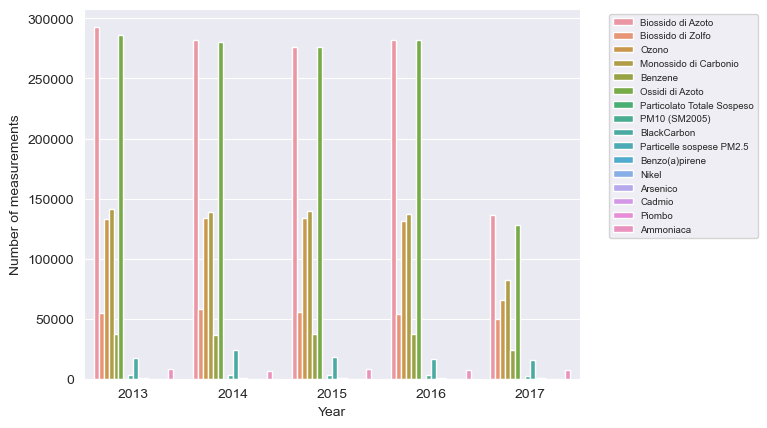

In [67]:
## Plot number of rows for each unique value in 'NomeTipoSensore' column per year in the air quality dataframe
sns.countplot(x='Year', hue='NomeTipoSensore', data=df_air_quality_dropped)
## label the y axis as 'Number of measurements'
plt.ylabel('Number of measurements')
plt.legend(fontsize='x-small', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [68]:
## Drop year 2017 from the air quality dataframe
df_air_quality = df_air_quality[df_air_quality['Year'] != 2017]
df_air_quality

,IdSensore,Data,Valore,Stato,UnitaMisura,NomeTipoSensore,Year,Month,Day,Hour,CumulativeDay,Week
25613,5504,2013-01-01 00:00:00,85.7,VA,µg/m³,Biossido di Azoto,2013,1,1,0,1,1
25614,5504,2013-01-01 01:00:00,78.5,VA,µg/m³,Biossido di Azoto,2013,1,1,1,1,1
25615,5504,2013-01-01 02:00:00,89.7,VA,µg/m³,Biossido di Azoto,2013,1,1,2,1,1
25616,5504,2013-01-01 03:00:00,90.3,VA,µg/m³,Biossido di Azoto,2013,1,1,3,1,1
25617,5504,2013-01-01 04:00:00,85.2,VA,µg/m³,Biossido di Azoto,2013,1,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12253468,29001,2015-05-27 19:00:00,1.1,VA,µg/m³,BlackCarbon,2015,5,27,19,147,21
12253469,29001,2015-05-27 20:00:00,1.1,VA,µg/m³,BlackCarbon,2015,5,27,20,147,21
12253470,29001,2015-05-27 21:00:00,1.2,VA,µg/m³,BlackCarbon,2015,5,27,21,147,21
12253471,29001,2015-05-27 22:00:00,3.3,VA,µg/m³,BlackCarbon,2015,5,27,22,147,21


In [69]:
## Count how many id sensors are in the air quality dataframe for each unique value in 'NomeTipoSensore' column
count = df_air_quality_dropped.groupby('NomeTipoSensore')['IdSensore'].nunique()


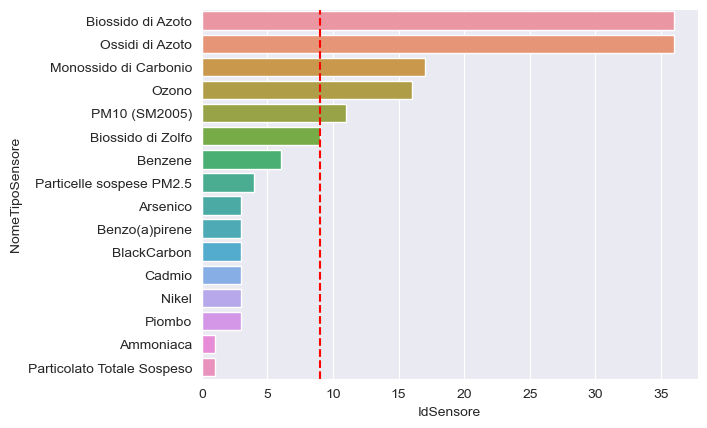

In [70]:
## Plot the number of id sensors for each unique value in 'NomeTipoSensore' column ordering the values in descending order and make a dashed line at value 10
sns.barplot(x=count, y=count.index, order=count.sort_values(ascending=False).index)
plt.axvline(x=9, color='red', linestyle='--')
plt.show()

In [71]:
## Save the air quality dataframe to a csv file
df_air_quality.to_csv('Air_quality_data/df_air_quality.csv', index=False)

In [33]:
## Remove rows where 'NomeTipoSensore' has the value 'Cadmio', 'Benzo(a)pirene', 'Nikel', 'Piombo', 'Arsenico', 'Ammoniaca', 'BlackCarbon', 'Particelle sospese PM2.5', 'Benzene'
df_air_quality = df_air_quality[~df_air_quality['NomeTipoSensore'].isin(['Cadmio', 'Benzo(a)pirene', 'Nikel', 'Piombo', 'Arsenico', 'Ammoniaca', 'BlackCarbon', 'Particelle sospese PM2.5', 'Benzene'])]
df_air_quality.head()

,IdSensore,Data,Valore,Stato,UnitaMisura,NomeTipoSensore
0,5504,01/01/2010 01:00:00,70.7,VA,µg/m³,Biossido di Azoto
1,5504,01/01/2010 02:00:00,73.0,VA,µg/m³,Biossido di Azoto
2,5504,01/01/2010 03:00:00,69.0,VA,µg/m³,Biossido di Azoto
3,5504,01/01/2010 04:00:00,66.0,VA,µg/m³,Biossido di Azoto
4,5504,01/01/2010 05:00:00,68.8,VA,µg/m³,Biossido di Azoto


In [34]:
## Count how many rows for each unique values of column 'Valore' that are less than 0 in the air quality dataframe
print(df_air_quality['Valore'][df_air_quality['Valore'] < 0].value_counts())

-9999.0    1676116
-0.2             2
-0.4             1
-0.1             1
Name: Valore, dtype: int64


In [29]:
# checking the number of weeks for each year
df_air_quality.groupby('Year')['Week'].max()

Year
2013    53
2014    53
2015    53
2016    53
2017    53
2018    53
Name: Week, dtype: int32

In [30]:
# printing the type of sensors 
df_air_quality['NomeTipoSensore'].unique()

array(['Biossido di Azoto', 'Biossido di Zolfo', 'Ozono',
       'Monossido di Carbonio', 'Ossidi di Azoto',
       'Particolato Totale Sospeso', 'PM10 (SM2005)'], dtype=object)

In [40]:
# dividing the dataframe in each dataframe for each type of sensor
typeofsensor = df_air_quality['NomeTipoSensore'].unique()

biossido_di_azoto = df_air_quality[df_air_quality['NomeTipoSensore'] == 'Biossido di Azoto']
biossido_di_zolfo = df_air_quality[df_air_quality['NomeTipoSensore'] == 'Biossido di Zolfo']
ozone = df_air_quality[df_air_quality['NomeTipoSensore'] == 'Ozono']
monossido_di_carbonio = df_air_quality[df_air_quality['NomeTipoSensore'] == 'Monossido di Carbonio']
ossidi_di_azoto = df_air_quality[df_air_quality['NomeTipoSensore'] == 'Ossidi di Azoto']
particolato = df_air_quality[df_air_quality['NomeTipoSensore'] == 'Particolato Totale Sospeso']
pm10 = df_air_quality[df_air_quality['NomeTipoSensore'] == 'PM10 (SM2005)']

In [157]:
# saving all the dataframes
biossido_di_azoto.to_csv('biossido_di_azoto.csv', index=False)
biossido_di_zolfo.to_csv('biossido_di_zolfo.csv', index=False)
ozone.to_csv('ozone.csv', index=False)
monossido_di_carbonio.to_csv('monossido_di_carbonio.csv', index=False)
ossidi_di_azoto.to_csv('ossidi_di_azoto.csv', index=False)
particolato.to_csv('particolato.csv', index=False)
pm10.to_csv('pm10.csv', index=False)

In [28]:
## Append the column 'Comune' to the air quality dataframe based on the 'IdSensore' column
df_air_quality = df_air_quality.merge(df_milano_stations[['IdSensore', 'Comune']], on='IdSensore')
df_air_quality.head()

,IdSensore,Data,Valore,Stato,UnitaMisura,NomeTipoSensore,Year,Month,Day,Hour,Comune
0,5504,2010-01-01 01:00:00,70.7,VA,µg/m³,Biossido di Azoto,2010,1,1,1,Milano
1,5504,2010-01-01 02:00:00,73.0,VA,µg/m³,Biossido di Azoto,2010,1,1,2,Milano
2,5504,2010-01-01 03:00:00,69.0,VA,µg/m³,Biossido di Azoto,2010,1,1,3,Milano
3,5504,2010-01-01 04:00:00,66.0,VA,µg/m³,Biossido di Azoto,2010,1,1,4,Milano
4,5504,2010-01-01 05:00:00,68.8,VA,µg/m³,Biossido di Azoto,2010,1,1,5,Milano


In [30]:
# Group by 'Year' and 'idSensore', and count the number of rows
result = df_air_quality.groupby(['Year', 'IdSensore']).size()

# Now print the result
print(result)

Year  IdSensore
2010  5504         8704
      5506         8450
      5507         8583
      5508         8500
      5511         8352
                   ... 
2024  10320           1
      10352           1
      20427           1
      20428           1
      20429           1
Length: 1413, dtype: int64


In [31]:
## Count how many NaN values in the column 'Valore' in the air quality dataframe
print(df_air_quality['Valore'].isnull().sum())

0


In [44]:
## Add a column 'YearlyAverage' to the air quality dataframe that contains the average value of 'Valore' for each year for each unique IdSensore
df_air_quality['YearlyAverage'] = df_air_quality.groupby(['Year', 'IdSensore'])['Valore'].transform('mean')
df_air_quality.head()

,IdSensore,Data,Valore,Stato,UnitaMisura,NomeTipoSensore,Year,Month,Day,Hour,Comune,YearlyAverage
0,5504,2010-01-01 01:00:00,70.7,VA,µg/m³,Biossido di Azoto,2010,1,1,1,Milano,73.336213
1,5504,2010-01-01 02:00:00,73.0,VA,µg/m³,Biossido di Azoto,2010,1,1,2,Milano,73.336213
2,5504,2010-01-01 03:00:00,69.0,VA,µg/m³,Biossido di Azoto,2010,1,1,3,Milano,73.336213
3,5504,2010-01-01 04:00:00,66.0,VA,µg/m³,Biossido di Azoto,2010,1,1,4,Milano,73.336213
4,5504,2010-01-01 05:00:00,68.8,VA,µg/m³,Biossido di Azoto,2010,1,1,5,Milano,73.336213


In [52]:
y_average=df_air_quality[['Year', 'IdSensore', 'NomeTipoSensore','YearlyAverage']].drop_duplicates()
y_average.head()

,Year,IdSensore,NomeTipoSensore,YearlyAverage
0,2010,5504,Biossido di Azoto,73.336213
8704,2011,5504,Biossido di Azoto,79.395491
16821,2012,5504,Biossido di Azoto,67.325237
25146,2013,5504,Biossido di Azoto,57.484775
33862,2014,5504,Biossido di Azoto,55.732471


In [56]:
y_average_2015=y_average[y_average['Year']==2015]
y_average_2015.head()

,Year,IdSensore,NomeTipoSensore,YearlyAverage
42368,2015,5504,Biossido di Azoto,75.268302
109921,2015,5506,Biossido di Azoto,67.156559
167184,2015,5507,Biossido di Azoto,60.002450
232172,2015,5508,Biossido di Azoto,39.301586
290854,2015,5511,Biossido di Azoto,24.758916


In [58]:
y_average_2015_BioAz = y_average_2015[y_average_2015['NomeTipoSensore']=='Biossido di Azoto']
y_average_2015_BioAz.shape

(35, 4)

In [59]:
y_average_2015_BioAz.to_csv('y_average_2015_BioAz.csv', index=False)

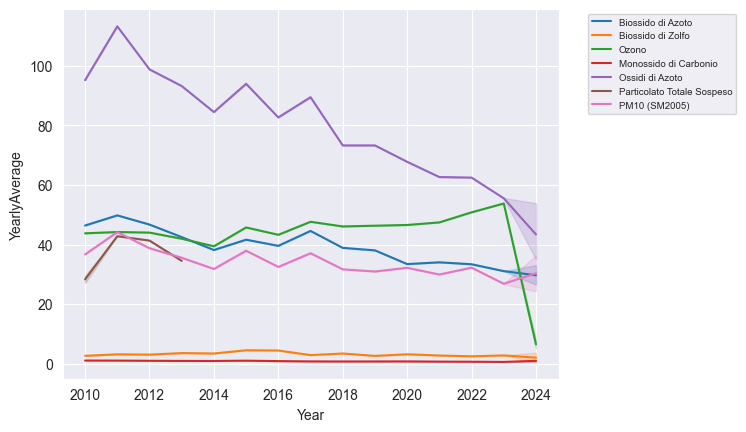

In [33]:
## Plot the average value of 'Valore' for each year for each unique IdSensore
sns.lineplot(x='Year', y='YearlyAverage', hue='NomeTipoSensore', data=df_air_quality)
plt.legend(fontsize='x-small', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()